In [0]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from skimage.io import imread, imshow
from keras.callbacks import EarlyStopping
from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam
from keras.models import model_from_json

In [0]:
from tensorflow.keras.datasets import mnist

In [0]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

(60000, 28, 28)
60000


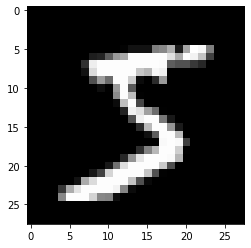

In [0]:
# Display of Image in MNIST dataset
plt.imshow(X_train[0],cmap="gray")
print(X_train.shape)
print(len(X_train))

In [0]:
# Converting Images pixel in range b/w 0 to 1 and provinding a channel so that it can statistfiy the criteria
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))

Image before Gaussian Noise


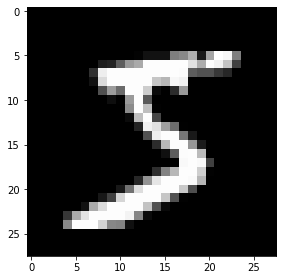

In [0]:
print("Image before Gaussian Noise")
imshow(np.squeeze(X_train[0])*255)
plt.show()

In [0]:
# adding Gaussian Noise 
mean =0.0
standard_deviation = 1.0
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=mean, scale= standard_deviation, size=X_train.shape) 
X_test_noisy = X_test + noise_factor * np.random.normal(loc=mean,scale=standard_deviation, size=X_test.shape) 

Image after adding Gaussian Noise


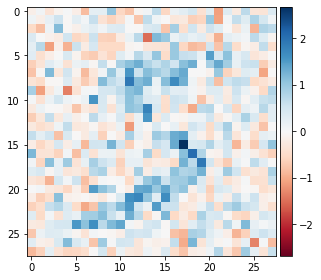

In [0]:
print("Image after adding Gaussian Noise")
imshow(np.squeeze(X_train_noisy[0]))
plt.show()

In [0]:
# Auto Encoder Model 
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
# from keras.layers import 
model = Sequential()
# compression
model.add(Conv2D(32, (3, 3), activation='elu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='elu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='elu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
# Decompression
model.add(Conv2D(8, (3, 3), activation='elu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='elu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='elu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

model.compile(optimizer='adadelta', loss='binary_crossentropy')

model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 8)         2312      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 8)          

In [0]:

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [0]:
history = model.fit(X_train_noisy, X_train, epochs=50, batch_size=256, shuffle=True, 
          validation_data=(X_test_noisy, X_test),callbacks=[es])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.2779 - val_loss: 0.2120
Epoch 2/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.1992 - val_loss: 0.1900
Epoch 3/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.1821 - val_loss: 0.1757
Epoch 4/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.1713 - val_loss: 0.1641
Epoch 5/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.1638 - val_loss: 0.1604
Epoch 6/50
60000/60000 [==============================] - 3s 47us/step - loss: 0.1588 - val_loss: 0.1547
Epoch 7/50
60000/60000 [==============================] - 3s 47us/step - loss: 0.1548 - val_loss: 0.1517
Epoch 8/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.1517 - val_loss: 0.1492
Epoch 9/50
60000/60000 [==============================] - 3s 47us/step - loss: 0.1489 - val_loss: 0.1456
Epoch

In [0]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


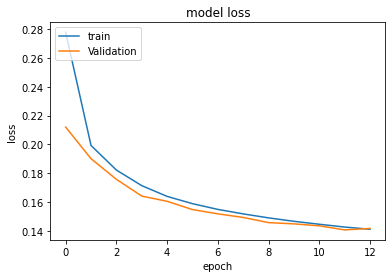

In [0]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

In [0]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [0]:
no_noise_img = model.predict(X_test_noisy)

Predicted Image from the model


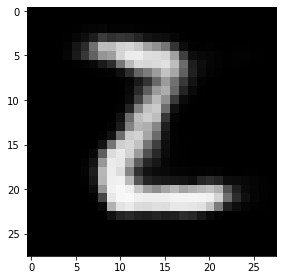

In [0]:
print("Predicted Image from the model")
imshow(np.squeeze(no_noise_img[1]))
plt.show()